In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def csv_to_pandas(file_path):
    df = pd.read_csv(file_path)
    return df

def generate_zooms_plot(df, dataset):
    zooms = [int(path.split('/')[2]) for path in df['Name'][:-1]]
    # Create a new figure
    plt.figure()

    # Create a scatter plot
    plt.scatter(zooms, df['Median Response Time'][:-1])

    # Add title and labels
    plt.title(dataset)
    plt.xlabel('Zoom')
    plt.ylabel('Time (ms)')

    # Display the plot
    plt.show()    

# The Datasets

In [3]:
csv_to_pandas('zarr_info.csv')

,source,variable,shape,lat resolution,lon resolution,chunk shape,chunk size mb,compression
0,s3://veda-data-store-staging/EIS/zarr/FWI-GEOS...,GEOS-5_FWI,"(26880, 533, 1152)",0.25,0.3125,"(120, 100, 100)",4.577637,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, ..."
1,s3://power-analysis-ready-datastore/power_901_...,TS,"(492, 361, 576)",0.50,0.6250,"(492, 25, 25)",2.346039,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, ..."
2,s3://cmip6-pds/CMIP6/CMIP/NASA-GISS/GISS-E2-1-...,tas,"(1980, 90, 144)",2.00,2.5000,"(600, 90, 144)",29.663086,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, ..."
3,https://ncsa.osn.xsede.org/Pangeo/pangeo-forge...,sst,"(15044, 720, 1440)",0.25,0.2500,"(1, 1, 720, 1440)",1.977539,Zlib(level=4)
4,s3://yuvipanda-test1/cmr/gpm3imergdl.zarr,precipitationCal,"(8149, 3600, 1800)",0.10,0.1000,"(10, 3600, 1800)",247.192383,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, ..."


# GPM IMERG `preciptationCal` (0.1°x0.1°)

In [5]:
file_path = 'results/gpm3imergdl_urls_stats.csv'
gpmimerg_df = csv_to_pandas(file_path)
gpmimerg_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/1/0/1.png?reference=False&variable=prec...,1,0,6432.841758,6432.841758,6432.841758,6432.841758,7800.0,0.002803,...,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400
1,GET,/tiles/2/2/1.png?reference=False&variable=prec...,1,0,3789.129100,3789.129100,3789.129100,3789.129100,12070.0,0.002803,...,3800,3800,3800,3800,3800,3800,3800,3800,3800,3800
2,GET,/tiles/2/3/1.png?reference=False&variable=prec...,1,0,3672.377983,3672.377983,3672.377983,3672.377983,14663.0,0.002803,...,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700
3,GET,/tiles/2/3/2.png?reference=False&variable=prec...,1,0,3715.161237,3715.161237,3715.161237,3715.161237,13162.0,0.002803,...,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700
4,GET,/tiles/3/0/0.png?reference=False&variable=prec...,1,0,3563.282697,3563.282697,3563.282697,3563.282697,693.0,0.002803,...,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600


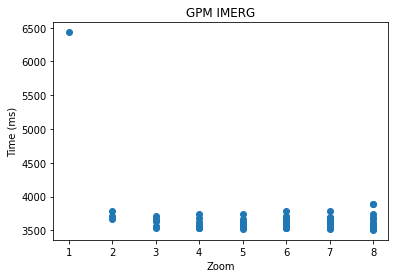

In [6]:
generate_zooms_plot(gpmimerg_df, 'GPM IMERG')

# GOES FWI (0.25°x0.3125°) results

In [7]:
file_path = 'results/FWI-GEOS-5-Hourly_urls_stats.csv'
goes_df = csv_to_pandas(file_path)
goes_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/1/0/1.png?reference=False&variable=GEOS...,1,0,9464.652482,9464.652482,9464.652482,9464.652482,4532.0,0.001189,...,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500
1,GET,/tiles/2/2/1.png?reference=False&variable=GEOS...,2,0,8630.785792,8817.393196,8630.785792,9004.000600,14358.0,0.002379,...,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000
2,GET,/tiles/2/2/2.png?reference=False&variable=GEOS...,1,0,8905.896570,8905.896570,8905.896570,8905.896570,8664.0,0.001189,...,8900,8900,8900,8900,8900,8900,8900,8900,8900,8900
3,GET,/tiles/3/0/1.png?reference=False&variable=GEOS...,1,0,8716.817426,8716.817426,8716.817426,8716.817426,693.0,0.001189,...,8700,8700,8700,8700,8700,8700,8700,8700,8700,8700
4,GET,/tiles/3/0/2.png?reference=False&variable=GEOS...,1,0,8580.980452,8580.980452,8580.980452,8580.980452,693.0,0.001189,...,8600,8600,8600,8600,8600,8600,8600,8600,8600,8600


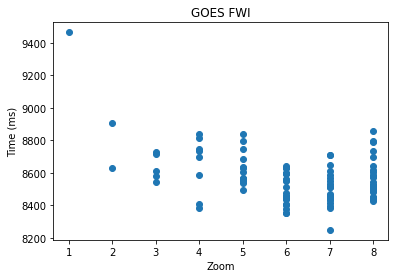

In [8]:
generate_zooms_plot(goes_df, 'GOES FWI')

# NOAA OISST Reference (0.25° x 0.25°) Results

In [9]:
file_path = 'results/aws-noaa-oisst-avhrr-only_urls_stats.csv'
noaa_oisst_df = csv_to_pandas(file_path)
noaa_oisst_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/1/1/0.png?reference=True&variable=sst&r...,1,0,7669.992996,7669.992996,7669.992996,7669.992996,15603.0,0.001989,...,7700,7700,7700,7700,7700,7700,7700,7700,7700,7700
1,GET,/tiles/2/1/0.png?reference=True&variable=sst&r...,1,0,5092.409214,5092.409214,5092.409214,5092.409214,4601.0,0.001989,...,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100
2,GET,/tiles/2/1/1.png?reference=True&variable=sst&r...,1,0,5149.119114,5149.119114,5149.119114,5149.119114,22783.0,0.001989,...,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100
3,GET,/tiles/2/1/3.png?reference=True&variable=sst&r...,1,0,5392.835605,5392.835605,5392.835605,5392.835605,693.0,0.001989,...,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400
4,GET,/tiles/3/0/3.png?reference=True&variable=sst&r...,1,0,5110.585678,5110.585678,5110.585678,5110.585678,11630.0,0.001989,...,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100


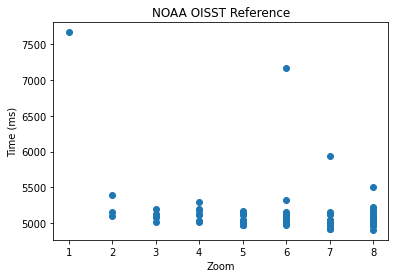

In [10]:
generate_zooms_plot(noaa_oisst_df, 'NOAA OISST Reference')

# POWER Results (0.5° x 0.625°)

In [11]:
file_path = 'results/power_901_monthly_meteorology_utc_urls_stats.csv'
power_df = csv_to_pandas(file_path)
power_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/1/1/1.png?reference=False&variable=TS&r...,1,0,2096.768733,2096.768733,2096.768733,2096.768733,11437.0,0.014384,...,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100
1,GET,/tiles/2/0/2.png?reference=False&variable=TS&r...,1,0,1064.098864,1064.098864,1064.098864,1064.098864,4576.0,0.014384,...,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100
2,GET,/tiles/2/1/1.png?reference=False&variable=TS&r...,1,0,1026.530591,1026.530591,1026.530591,1026.530591,10811.0,0.014384,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
3,GET,/tiles/2/2/0.png?reference=False&variable=TS&r...,1,0,795.397935,795.397935,795.397935,795.397935,3792.0,0.014384,...,800,800,800,800,800,800,800,800,800,800
4,GET,/tiles/3/0/5.png?reference=False&variable=TS&r...,1,0,776.598629,776.598629,776.598629,776.598629,2029.0,0.014384,...,780,780,780,780,780,780,780,780,780,780


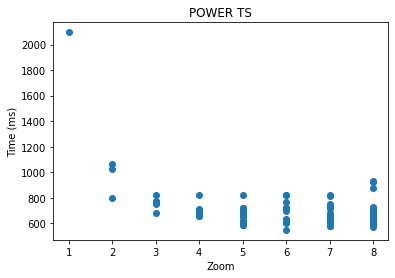

In [12]:
generate_zooms_plot(power_df, 'POWER TS')

# CMIP6 Historical Results (2° x 2.5°)

In [17]:
file_path = 'results/CMIP6_GISS-E2-1-G_historical_urls_stats.csv'
cmip6_df = csv_to_pandas(file_path)
cmip6_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/1/1/1.png?reference=False&variable=tas&...,1,0,6706.213361,6706.213361,6706.213361,6706.213361,3163.0,0.010036,...,6700,6700,6700,6700,6700,6700,6700,6700,6700,6700
1,GET,/tiles/2/0/0.png?reference=False&variable=tas&...,1,0,924.231987,924.231987,924.231987,924.231987,1156.0,0.010036,...,920,920,920,920,920,920,920,920,920,920
2,GET,/tiles/2/2/0.png?reference=False&variable=tas&...,1,0,909.386235,909.386235,909.386235,909.386235,1229.0,0.010036,...,910,910,910,910,910,910,910,910,910,910
3,GET,/tiles/2/3/0.png?reference=False&variable=tas&...,1,0,1022.679356,1022.679356,1022.679356,1022.679356,1174.0,0.010036,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
4,GET,/tiles/3/0/0.png?reference=False&variable=tas&...,1,0,1032.765083,1032.765083,1032.765083,1032.765083,759.0,0.010036,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


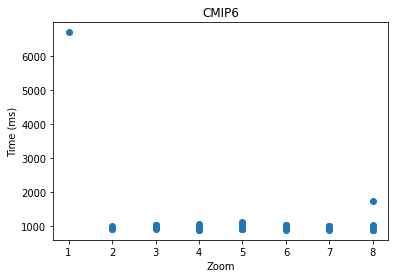

In [14]:
generate_zooms_plot(cmip6_df, 'CMIP6')

In [15]:
print(gpmimerg_df[-1:]['Median Response Time'])
print(goes_df[-1:]['Median Response Time'])
print(noaa_oisst_df[-1:]['Median Response Time'])
print(power_df[-1:]['Median Response Time'])
print(cmip6_df[-1:]['Median Response Time'])

97    3600.0
Name: Median Response Time, dtype: float64
96    8600.0
Name: Median Response Time, dtype: float64
98    5000.0
Name: Median Response Time, dtype: float64
98    670.0
Name: Median Response Time, dtype: float64
98    930.0
Name: Median Response Time, dtype: float64
